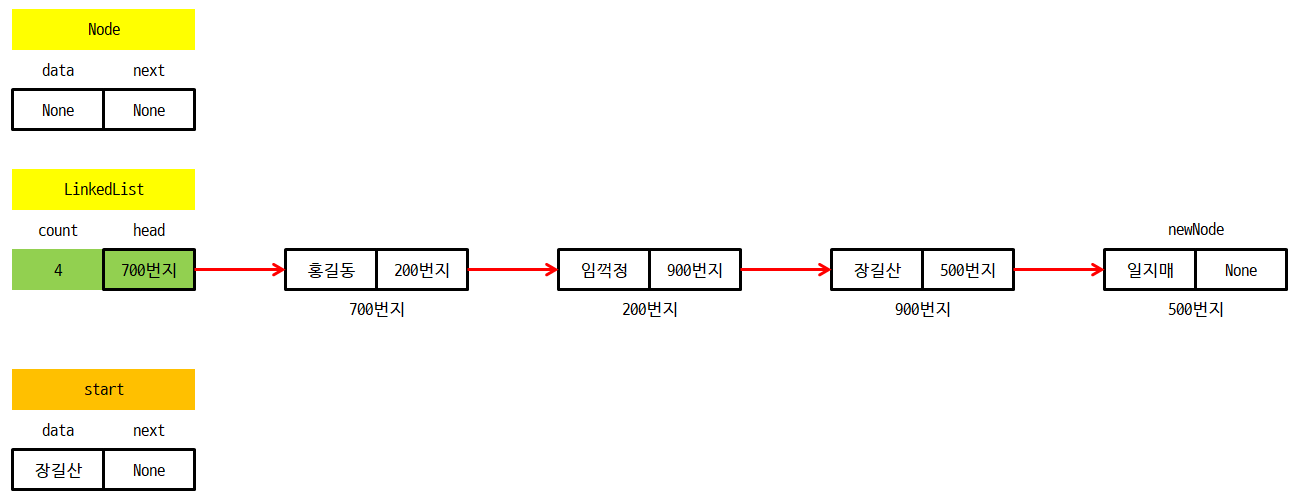

In [5]:
from IPython.display import Image
Image('./linkedList.png', width='1200')

In [6]:
# linkedList에 저장할 데이터를 기억하는 클래스 => 노드
class Node:
    def __init__(self, data = None):
        self.data = data # linkedList에 저장할 실제 데이터
        self.next = None # 다음 데이터의 위치(주소)

In [17]:
# linkedList 자체를 의미하는 클래스
class LinkedList:
    def __init__(self):
        self.count = 0   # linkedList에 저장된 데이터의 개수
        self.head = None # linkedList의 시작 위치
        
    # linkedList에 데이터를 입력하는 경우의 수는 모두 3가지가 있다.
    # 1. linkedList의 맨 뒤에 데이터를 추가하는 경우
    # 2. linkedList의 맨 앞(head 다음 위치)에 데이터를 삽입하는 경우
    # 3. linkedList의 맨 앞과 맨 뒤를 제외한 특정 위치에 데이터를 삽입하는 경우
    
    # 1. linkedList의 맨 뒤에 데이터를 추가하는 함수
    def appendLast(self, data):
        # linkedList의 맨 뒤에 추가할 데이터(data)를 넘겨받아 Node 클래스(linkedList에 저장할 데이터) 객체를 만든다. 
        newNode = Node(data)
        # print(newNode) # Node 클래스 객체가 메모리에 생성된 주소가 출력된다.
        # linkedList에 저장된 데이터의 개수를 중가시킨다.
        self.count += 1
        
        # linkedList가 비어있을 경우와 비어있지 않을 경우에 따라서 linkedList에 데이터를 추가하는 방법이 다르다.
        # linkedList가 비어있나 물어봐서 비어있으면 head 바로 다음에 추가한다.
        if self.head is None: # 빈 linkedList 인가?
            # linkedList가 비어있으므로 head 다음에 데이터를 넣어준다. => head에 newNode가 메모리에 생성된 주소를 넣어준다.
            self.head = newNode
            # 데이터를 head 다음에 추가했으므로 더 이상 appendLast() 함수를 실행할 이유가 없으므로 return 시켜 종료한다.
            return
        # ===== if => head 다음에 데이터 추가
        
        # linkedList가 비어있지 않다면 linkedList에 저장된 데이터가 있다는 것이므로 linkedList의 마지막 위치로 이동한 후
        # 데이터를 추가한다.
        # linkedList의 시작 위치를 지정한다.
        start = self.head
        # head 부터 시작해서 linkedList의 마지막 데이터로 이동한다. => 마지막 데이터는 next에 None이 저장되어 있다.
        # start.data는 현재 데이터를 의미하고 start.next는 다음 데이터가 저장된 주소를 의미한다.
        # start.next에 저장된 값이 None이 아니면 True로 취급하고, None면 False로 취급된다.
        while start.next: # linkedList에 저장된 다음 데이터가 있는가?
            start = start.next
        # 더 이상 다음 데이터가 없으면 현재 데이터가 마지막 데이터이므로 현재 데이터 다음에 새 데이터를 추가한다.
        start.next = newNode
        
    # 2. linkedList의 맨 앞(head 다음 위치)에 데이터를 삽입하는 함수
    def insertFirst(self, data):
        newNode = Node(data)
        self.count += 1
        
        # linkedList의 맨 뒤에 데이터를 저장하는 경우를 제외한 나머지 경우는 데이터를 추가할 때 추가하는 순서를 반드시 지켜야
        # 한다.
        # 추가할 데이터(newNode)의 다음 데이터를 기억하는 next에 이전 데이터의 next에 저장된 값을 넣어준다.
        # 맨 앞에 추가할 때는 다음 데이터를 기억하는 next에 head에 저장된 값을 넣어준다.
        newNode.next = self.head
        # head에는 새로 삽입되는 데이터(newNode)의 주소를 넣어준다.
        self.head = newNode
        
    # 3. linkedList의 맨 앞과 맨 뒤를 제외한 특정 위치에 데이터를 삽입하는 함수
    def insertPosition(self, position, data):
        # 데이터가 삽입될 위치가 올바른가 검사한다. => 올바른 위치가 아니면 메시지를 표시하고 함수를 종료한다.
        if position < 1 or position > self.count - 1:
            print('{}번째 위치는 {} 데이터가 삽입될 위치로 올바르지 않습니다.'.format(position, data))
            return
        # =====
        
        # 데이터가 삽입될 위치가 올바르기 때문에 position 번째 위치에 데이터를 삽입한다.
        newNode = Node(data)
        self.count += 1
        
        # 데이터가 삽입될 바로 전 위치를 찾는다. => 반복은 position - 1 만큼만 시킨다.
        start = self.head
        for i in range(position - 1):
            start = start.next
        # 데이터가 삽입될 위치를 찾았으므로 데이터를 삽입한다.
        newNode.next = start.next
        start.next = newNode
        
    # linkedList에 저장된 모든 데이터를 출력하는 함수
    def listPrint(self):
        start = self.head
        if start is None:
            print('linkedList에 저장된 데이터가 없습니다.')
        else:
            print('linkedList에 저장된 데이터가 {}개 있습니다.'.format(self.count), end=' ')
            for i in range(self.count):
                print(start.data, end=' ')
                # 다음 데이터로 접근한다.
                start = start.next
            print()
    
    # linkedList에 저장된 데이터를 찾아서 제거하는 함수
    def remove(self, data):
        start = self.head
        # linkedList가 비어있지 않은가 판단해서 linkedList의 데이터를 삭제한다.
        if start is None:
            print('linkedList가 비어있습니다.')
        else:
            # linkedList에 저장된 데이터가 있으므로 데이터를 찾아서 제거한다.
            # 제거할 데이터가 0번째 index의 데이터일 경우
            if start.data == data:
                # 1번째 index의 데이터 위치를 head에 넣어준다.
                self.head = start.next
                # linkedLisr에 저장된 데이터를 삭제했으므로 데이터의 개수를 1감소시킨다.
                self.count -= 1
                return
        # ==== if

In [18]:
print('linkedList를 만든다.')
linkedList = LinkedList() # linkedList를 막 만들었으므로 비어있는 linkedList 이다.
linkedList.listPrint()
linkedList.remove('홍길동')
print('=' * 80)

print('linkedList의 head 다음에 데이터를 추가한다.')
linkedList.appendLast('홍길동')
linkedList.listPrint()
print('=' * 80)

print('linkedList의 맨 뒤에 데이터를 추가한다.')
linkedList.appendLast('임꺽정')
linkedList.listPrint()
linkedList.appendLast('장길산')
linkedList.listPrint()
linkedList.appendLast('일지매')
linkedList.listPrint()
print('=' * 80)

print('linkedList의 맨 앞(head 다음)에 데이터를 삽입한다.')
linkedList.insertFirst('손오공')
linkedList.listPrint()
print('=' * 80)

print('linkedList의 맨 앞과 맨 뒤를 제외한 위치에 데이터를 삽입한다.')
linkedList.insertPosition(0, '저팔계')
linkedList.insertPosition(5, '저팔계')
linkedList.insertPosition(4, '사오정')
linkedList.listPrint()
print('=' * 80)

print('linkedList의 index가 0인 데이터를 제거한다.')
linkedList.remove('손오공')
linkedList.listPrint()
print('=' * 80)

linkedList를 만든다.
linkedList에 저장된 데이터가 없습니다.
linkedList가 비어있습니다.
linkedList의 head 다음에 데이터를 추가한다.
linkedList에 저장된 데이터가 1개 있습니다. 홍길동 
linkedList의 맨 뒤에 데이터를 추가한다.
linkedList에 저장된 데이터가 2개 있습니다. 홍길동 임꺽정 
linkedList에 저장된 데이터가 3개 있습니다. 홍길동 임꺽정 장길산 
linkedList에 저장된 데이터가 4개 있습니다. 홍길동 임꺽정 장길산 일지매 
linkedList의 맨 앞(head 다음)에 데이터를 삽입한다.
linkedList에 저장된 데이터가 5개 있습니다. 손오공 홍길동 임꺽정 장길산 일지매 
linkedList의 맨 앞과 맨 뒤를 제외한 위치에 데이터를 삽입한다.
0번째 위치는 저팔계 데이터가 삽입될 위치로 올바르지 않습니다.
5번째 위치는 저팔계 데이터가 삽입될 위치로 올바르지 않습니다.
linkedList에 저장된 데이터가 6개 있습니다. 손오공 홍길동 임꺽정 장길산 사오정 일지매 
linkedList의 index가 0인 데이터를 제거한다.
linkedList에 저장된 데이터가 5개 있습니다. 홍길동 임꺽정 장길산 사오정 일지매 
